In [ ]:
1 # Data manipulation
2 import numpy as np
3 import pandas as pd
4
5 # Visualization
6 import matplotlib . pyplot as plt
7 import seaborn as sns
8
9 # Machine Learning
10 from sklearn . model_selection import train_test_split , cross_val_score
11 from sklearn . preprocessing import StandardScaler , LabelEncoder
12 from sklearn . linear_model import LinearRegression , Ridge , Lasso
13 from sklearn . metrics import mean_squared_error , mean_absolute_error ,
r2_score
14
15 # Statistics
16 from scipy import stats
17
18 # Settings
19 import warnings
20 warnings . filterwarnings (’ignore ’)
21 sns . set_style (’whitegrid ’)
22 plt . rcParams [’figure . figsize ’] = (10 , 6)
23
24 print (" Libraries imported successfully !")

SAMPLE DATA:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Da


MISSING VALUES:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


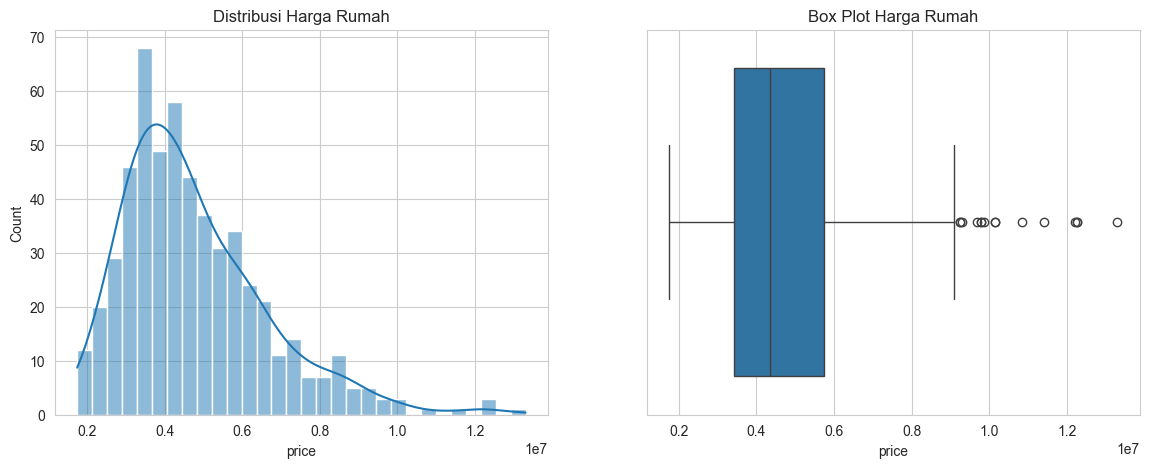

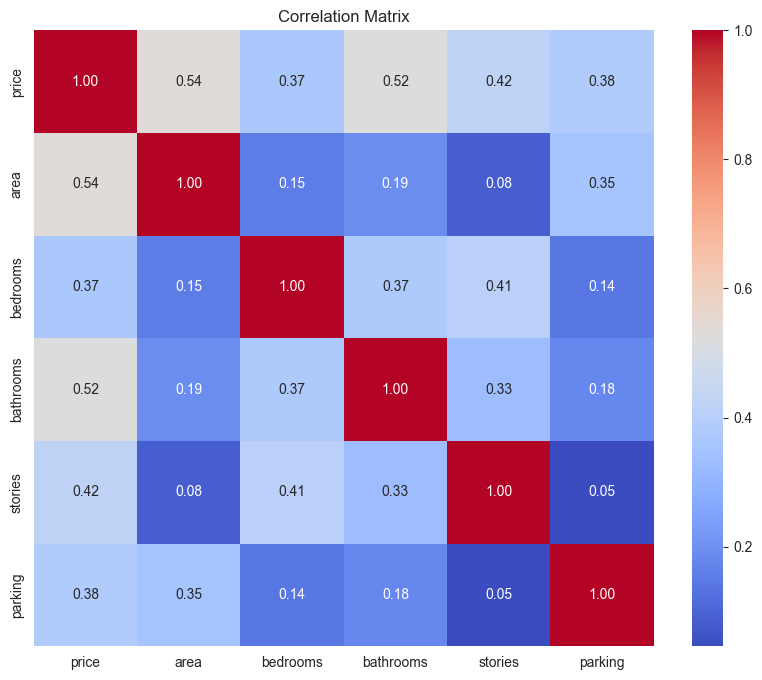

In [24]:
# Cek Missing Values
print("\nMISSING VALUES:")
print(data.isnull().sum())

# Visualisasi Distribusi Harga
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribusi Harga Rumah')
sns.boxplot(x=data['price'], ax=axes[1])
axes[1].set_title('Box Plot Harga Rumah')
plt.show()

# Korelasi (Hanya kolom numerik)
numeric_cols = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [25]:
# 1. Encoding (Mengubah yes/no menjadi 1/0)
# Kita copy dulu datanya agar data asli aman
df = data.copy()
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

df[binary_cols] = df[binary_cols].apply(binary_map)

# One-hot encoding untuk furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# 2. Split Data
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kembalikan ke DataFrame agar nama kolom tetap ada
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Preprocessing Selesai.")
print(X_train_scaled.head())

Preprocessing Selesai.
       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  0.384168  0.055271   1.539173  2.587644  0.407155  -0.466773 -0.746420   
1  0.929181  0.055271   1.539173 -0.912499  0.407155  -0.466773  1.339728   
2 -0.607755 -1.283514  -0.557950 -0.912499  0.407155  -0.466773  1.339728   
3 -1.155492  0.055271  -0.557950  0.254215  0.407155  -0.466773  1.339728   
4 -0.637730  0.055271  -0.557950  0.254215  0.407155  -0.466773 -0.746420   

   hotwaterheating  airconditioning   parking  prefarea  \
0        -0.230521         1.501243  0.367957 -0.552620   
1        -0.230521         1.501243  2.709987 -0.552620   
2        -0.230521         1.501243  1.538972 -0.552620   
3        -0.230521        -0.666115 -0.803059  1.809561   
4        -0.230521        -0.666115 -0.803059 -0.552620   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                        -0.870669                     -0.676900  
1                        

In [26]:
# Train Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Cek Koefisien
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False, key=abs)
print(coef_df)

# Prediksi
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

# Fungsi Evaluasi
def evaluate_model(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {label} ---")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R2 Score: {r2:.4f}")
    return r2

print("\nEVALUASI:")
evaluate_model(y_train, y_pred_train, "Training Set")
evaluate_model(y_test, y_pred_test, "Test Set")

                            Feature    Coefficient
2                         bathrooms  521879.027748
0                              area  519552.416340
8                   airconditioning  365157.393851
3                           stories  349251.438906
10                         prefarea  266656.351993
12     furnishingstatus_unfurnished -192015.917982
9                           parking  192005.953667
6                          basement  187067.803214
7                   hotwaterheating  149862.702991
4                          mainroad  128498.628215
5                         guestroom   88768.667686
11  furnishingstatus_semi-furnished  -62837.321865
1                          bedrooms   57349.559419

EVALUASI:
--- Training Set ---
RMSE: 984,051.92
R2 Score: 0.6859
--- Test Set ---
RMSE: 1,324,506.96
R2 Score: 0.6529


0.6529242642153174

In [27]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Bandingkan R2 Score
print("\nPERBANDINGAN R2 SCORE (TEST SET):")
print(f"Linear Regression: {r2_score(y_test, y_pred_test):.4f}")
print(f"Ridge: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Lasso: {r2_score(y_test, y_pred_lasso):.4f}")

# Cek Fitur yang di-nol-kan oleh Lasso
lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)
print("\nFitur yang dibuang Lasso (Koefisien 0):")
print(lasso_coef[lasso_coef == 0].index.tolist())


PERBANDINGAN R2 SCORE (TEST SET):
Linear Regression: 0.6529
Ridge: 0.6528
Lasso: 0.6529

Fitur yang dibuang Lasso (Koefisien 0):
[]
